## 1978년 이후 5년 간의 데이터 

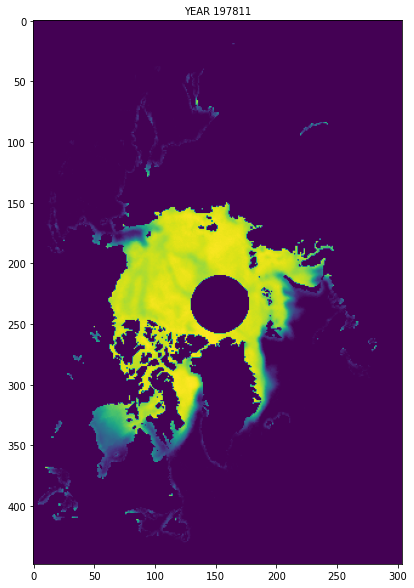

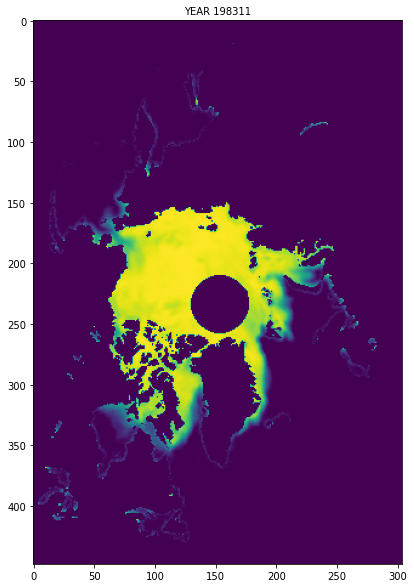

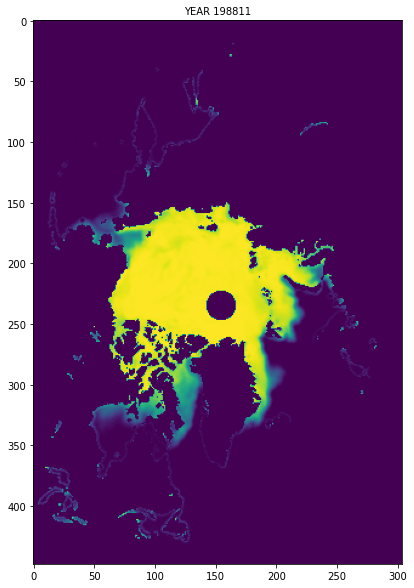

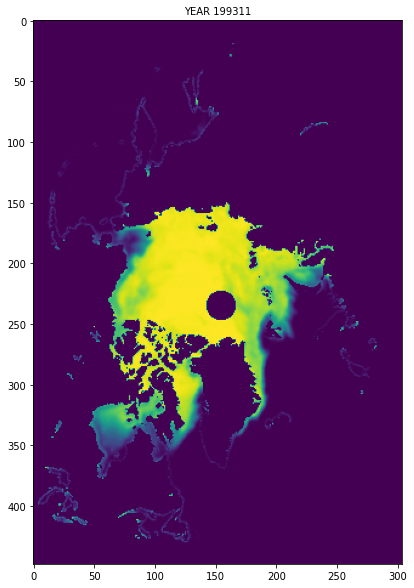

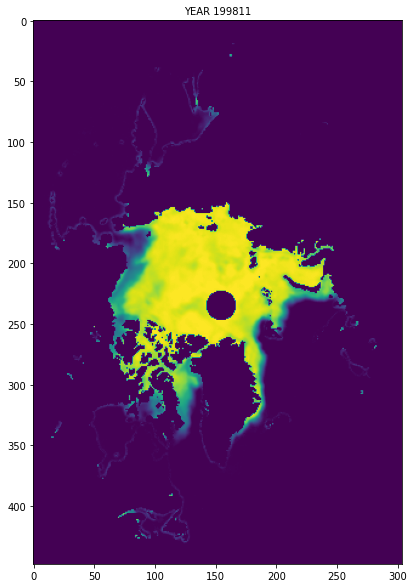

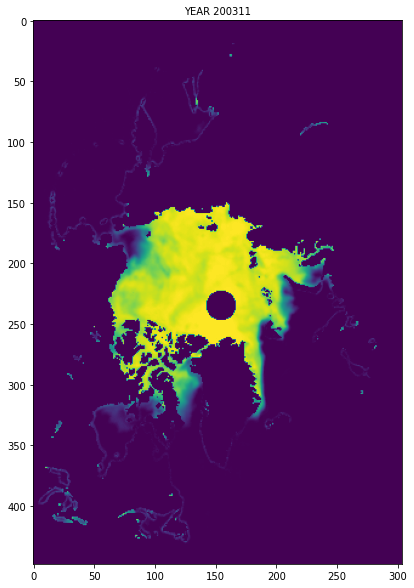

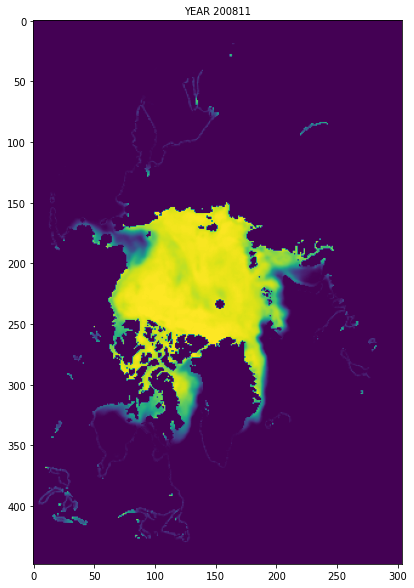

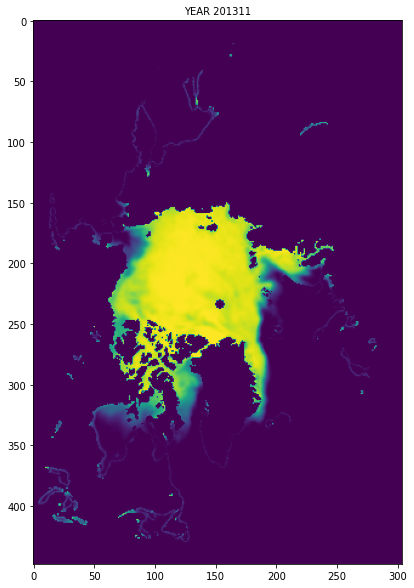

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms 

for i in range(197811,201811,500):
    loaded = np.load('./data/train/%d.npy'%i)
    pltsize = 10
    plt.figure(figsize=(5 * pltsize, pltsize))
    plt.title("YEAR %d"%i, fontsize=10)
    plt.imshow(loaded[:,:,0])
        


In [27]:
from glob import glob
data_path = './data/train/'
file_list = glob(data_path+'*.npy')
file_list.sort()
data_set = []
batch = []
for i in range(len(file_list)) :
    if i >= 12 :
        train_list = []
        for j in range(i-12,i) :
            file = np.load(file_list[j])
            train_list.append(file)
        train_list = tuple(train_list)
        label  = np.load(file_list[i])
        batch.append(tuple([train_list, label]))

AEdataset = []
for i in range(len(file_list)) :
    file = np.load(file_list[j])
    AEdataset.append(file)
       
        
    
        

## 2017년 1년간의 변화

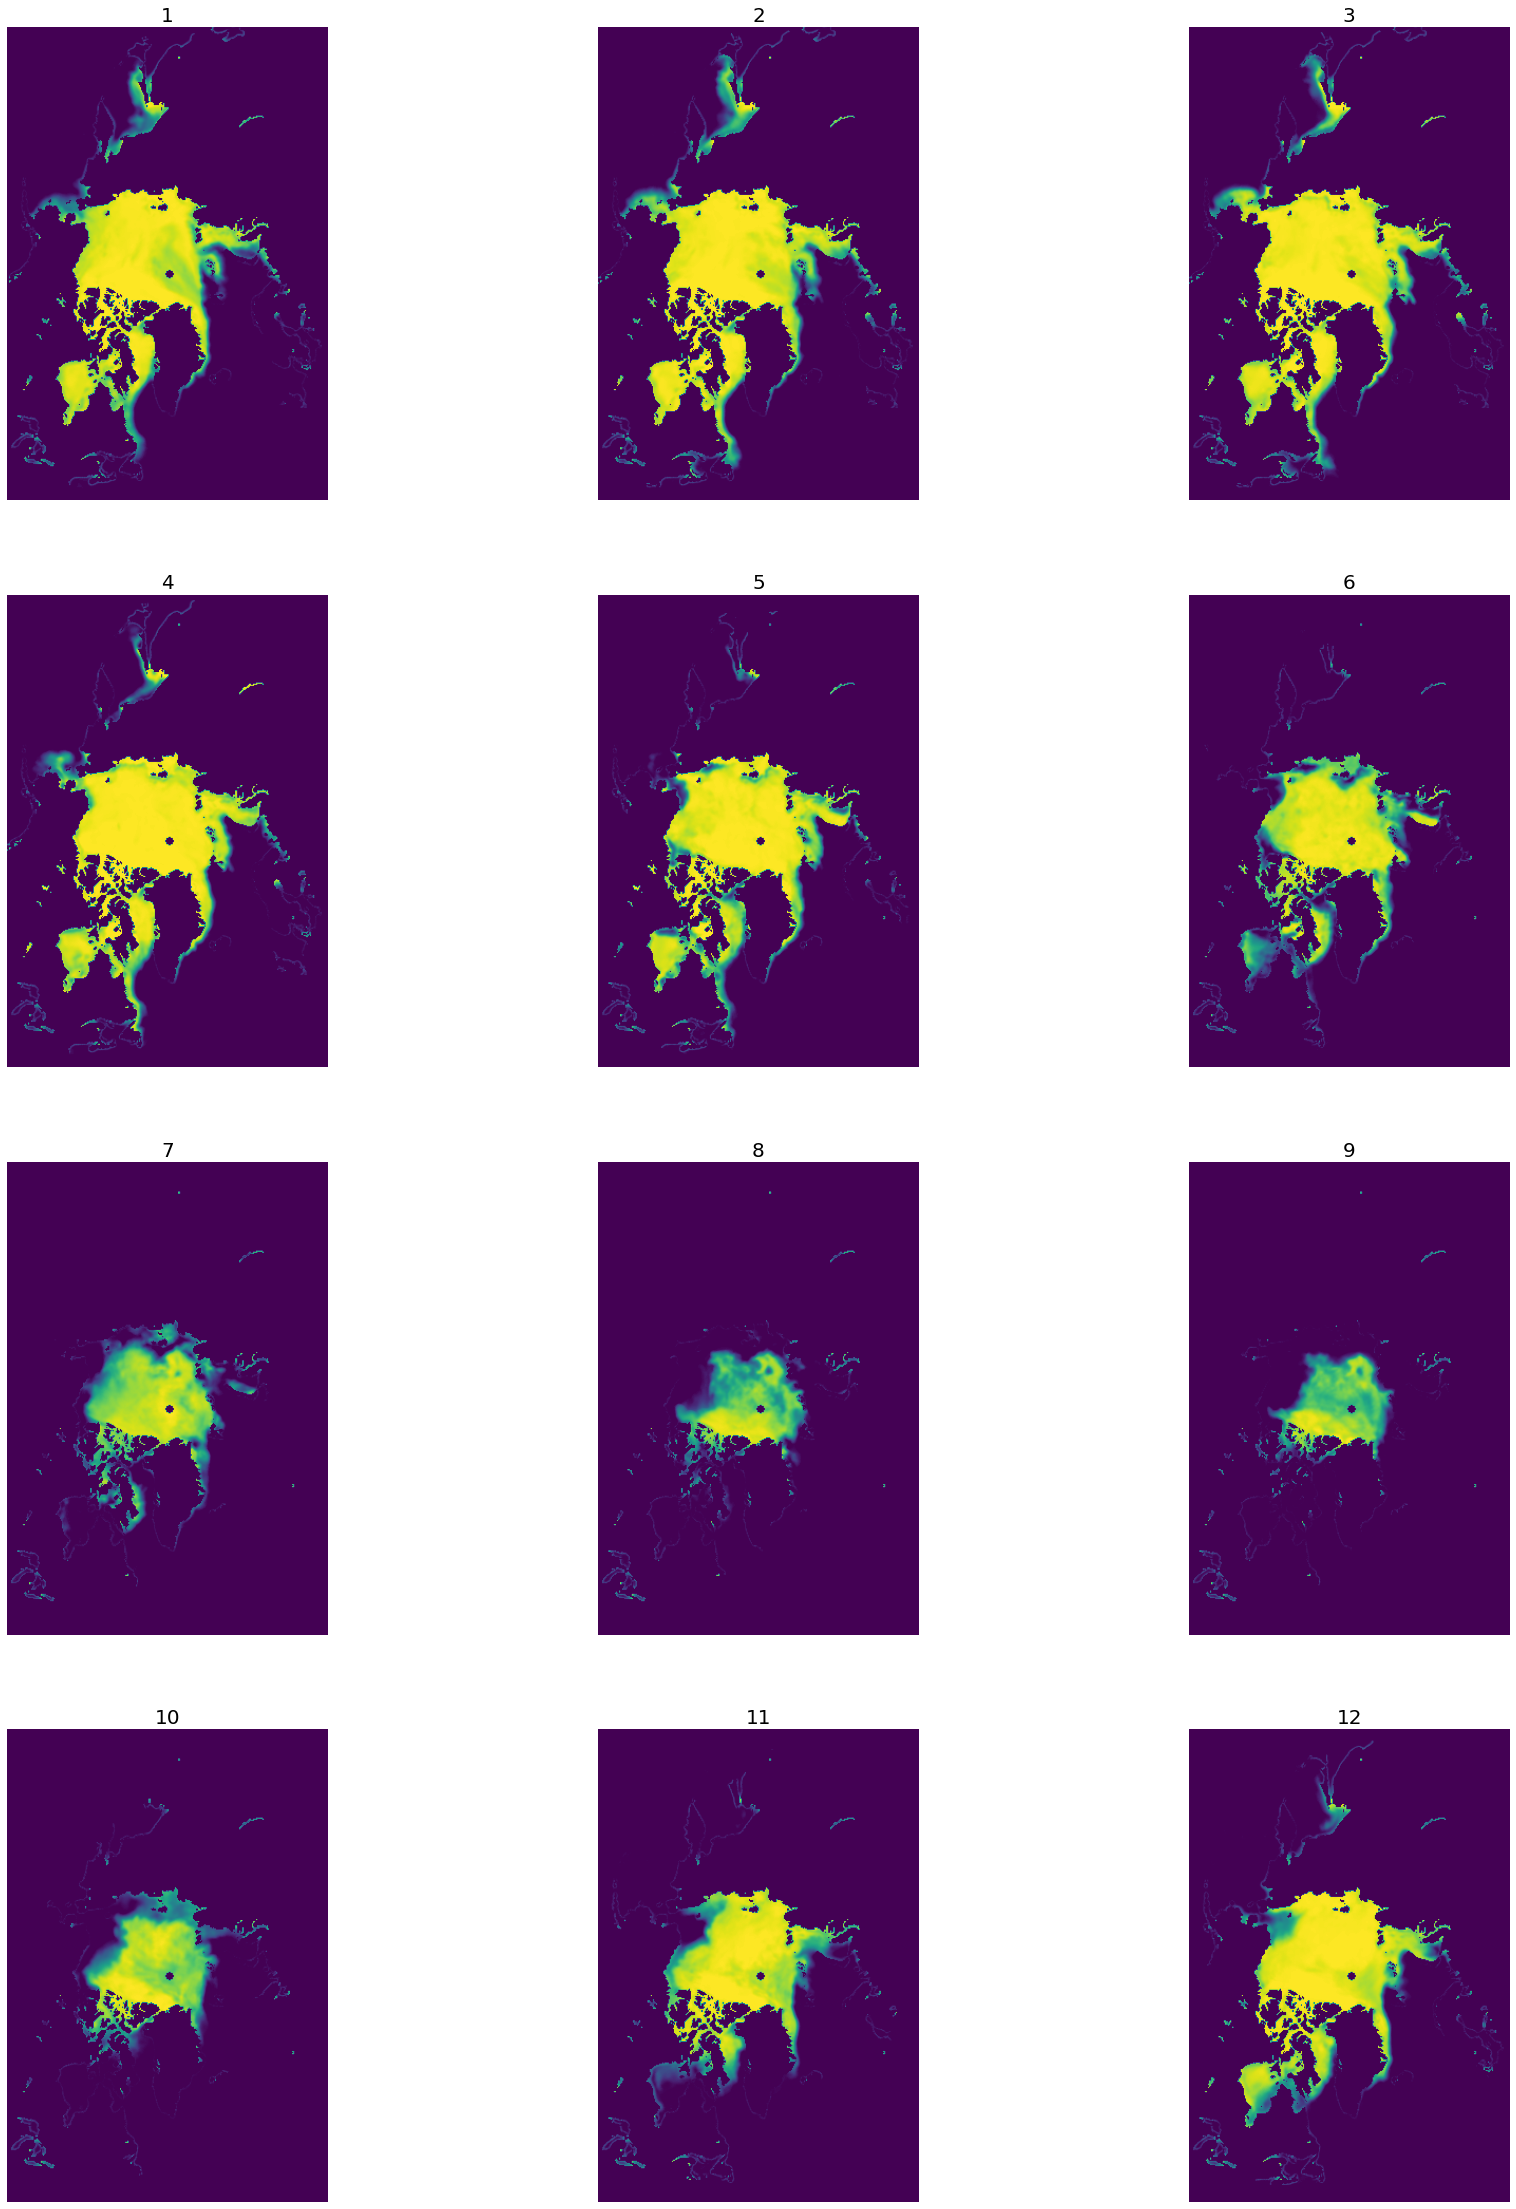

In [13]:
pltsize = 10
plt.figure(figsize = (3 * pltsize,4*pltsize))
for i in range(201701,201713):
    loaded = np.load('./data/train/%d.npy'%i)
    plt.subplot(4,3,i-201700)
    plt.axis('off')
    plt.title("%d"%(i-201700), fontsize=20)
    plt.imshow(loaded[:,:,0])
        

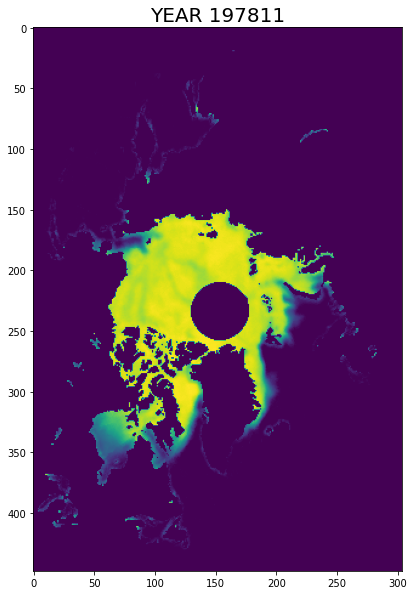

In [3]:
loaded = np.load('./data/train/197811.npy')
pltsize = 10
plt.figure(figsize=(5 * pltsize, pltsize))
plt.title("YEAR %d"%197811, fontsize=20)
plt.imshow(loaded[:,:,0])

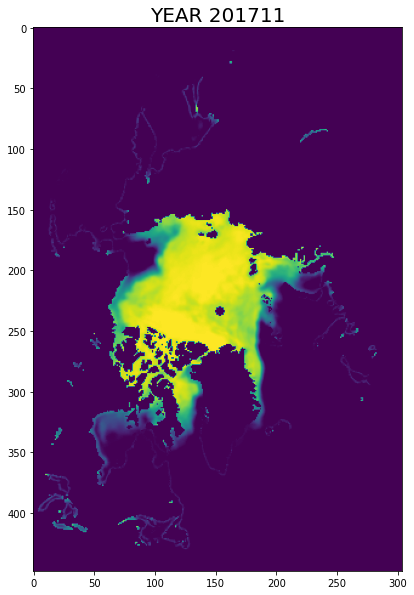

In [4]:
loaded = np.load('./data/train/201711.npy')
pltsize = 10
plt.figure(figsize=(5 * pltsize, pltsize))
plt.title("YEAR %d"%201711, fontsize=20)
plt.imshow(loaded[:,:,0])

In [ ]:
class CNN(nn.module) :
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=5,
            out_channels=20,
            kernel_size=7,
            padding=3
        )
        self.conv2 = nn.Conv2d(
            in_channels= 20 ,
            out_channels= 40,
            kernel_size= 7,
            padding= 0

        )
        self.maxpool  =nn.MaxPool2d(kernel_size=2,stride=2)
        self.subsampling = nn.AvgPool2d(kernel_size=2,stride=2)
        self.C5 = nn.Linear(5*5*16, 120)
        self.F6 = nn.Linear(120, 84)
        self.output = nn.Linear(84,10)
    def forward(self,x):
        # INPUT 2 C1
        x = self.conv1(x)
        x = F.tanh(x)

        # C1 2 S2
        x = self.subsampling(x)

        # S2 2 C3
        x = self.conv2(x)
        x = F.tanh(x)

        # C3 2 S4
        x = self.subsampling(x)

        # S4 2 C5
        x = x.view(-1, 5*5*16)
        x = self.C5(x)
        x = F.tanh(x)

        # C5 2 F6
        x = self.F6(x)
        x = F.tanh(x)

        # F6 2 OUTPUT -> 구현 실패 
        x = self.output(x)
        x = F.log_softmax(x)

        return x